Contact Binary Hierarchy
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

Here we'll initialize a default binary, but ask for it to be created as a contact system.

In [3]:
b_cb = phoebe.default_binary(contact_binary=True)

We'll compare this to the default detached binary

In [4]:
b_detached = phoebe.default_binary()

Hierarchy
-------------

Let's first look at the hierarchy of the default detached binary, and then compare that to the hierarchy of the overcontact system

In [5]:
print(b_detached.hierarchy)


    orbit:binary
    
        star:primary
        star:secondary
    



In [6]:
print(b_cb.hierarchy)


    orbit:binary
    
        star:primary
        star:secondary
        envelope:contact_envelope
    



As you can see, the overcontact system has an additional "component" with method "envelope" and component label "contact_envelope".

Next let's look at the parameters in the envelope and star components. You can see that most of parameters in the envelope class are constrained, while the equivalent radius of the primary is unconstrained. The value of primary equivalent radius constrains the potential and fillout factor of the envelope, as well as the equivalent radius of the secondary.

In [7]:
print(b_cb.filter(component='contact_envelope', kind='envelope', context='component'))

ParameterSet: 5 parameters
  abun@contact_envelope@compo...: 0.0
* fillout_factor@contact_enve...: 0.6417897080768679
* pot@contact_envelope@component: 3.4013774072298766
* pot_min@contact_envelope@co...: 3.2067962240861534
* pot_max@contact_envelope@co...: 3.75


In [8]:
print(b_cb.filter(component='primary', kind='star', context='component'))

ParameterSet: 16 parameters
        requiv@primary@component: 1.5 solRad
*   requiv_max@primary@component: 1.6724563972838384 solRad
*   requiv_min@primary@component: 1.2725418568681297 solRad
          teff@primary@component: 6000.0 K
*         logg@primary@component: 4.0897361581316245
       syncpar@primary@component: 1.0
*       period@primary@component: 0.5 d
*         freq@primary@component: 12.56637 rad / d
     gravb_bol@primary@component: 0.32
  irrad_frac_refl_bol@primary...: 0.6
* irrad_frac_lost_bol@primary...: 0.4
   ld_mode_bol@primary@component: lookup
   ld_func_bol@primary@component: logarithmic
  ld_coeffs_source_bol@primar...: auto
*         mass@primary@component: 1.0089067994531358 solMass
*          sma@primary@component: 1.675 solRad


In [9]:
b_cb['requiv@primary'] = 1.5

In [10]:
b_cb['pot@contact_envelope@component']

<Parameter: pot=3.4013774072298766 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, advanced>

In [11]:
b_cb['fillout_factor@contact_envelope@component']

<Parameter: fillout_factor=0.6417897080768679 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, advanced>

In [12]:
b_cb['requiv@secondary@component']

<Parameter: requiv=1.4999999999999074 solRad | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, advanced>

Now, of course, if we didn't originally know we wanted a contact binary and built the default detached system, we could still turn it into an contact binary just by changing the hierarchy.

In [13]:
b_detached.add_component('envelope', component='contact_envelope')

<ParameterSet: 5 parameters | qualifiers: pot_max, abun, pot_min, fillout_factor, pot>

In [14]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'], b_detached['contact_envelope'])
print(hier)

orbit:binary(star:primary, star:secondary, envelope:contact_envelope)


In [15]:
b_detached.filter(context='constraint',constraint_func='pitch',component='primary')

<ParameterSet: 1 parameters>

In [16]:
b_detached.set_hierarchy(hier)

Fri, 13 Dec 2019 11:02 BUNDLE       ERROR   Constraint 'pot@contact_envelope@envelope@constraint' raised the following error while attempting to solve for 'pot@contact_envelope@envelope@component'.  Consider flipping the constraint or changing the value of one of ['requiv@primary@star@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'pot@contact_envelope@envelope@component'] until the constraint succeeds.  Original error: roche_contact_Omega_at_partial_vol::Volume is outside bounds.
Fri, 13 Dec 2019 11:02 BUNDLE       WARNING secondary is overflowing at L2/L3 (requiv=2.261321950354358, requiv_min=0.1, requiv_max=2.013275176537638)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 13 Dec 2019 11:02 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will conti

Fri, 13 Dec 2019 11:02 BUNDLE       WARNING secondary is overflowing at L2/L3 (requiv=2.261321950354358, requiv_min=0.1, requiv_max=2.013275176537638)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 13 Dec 2019 11:02 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 13 Dec 2019 11:02 BUNDLE       WARNING primary is underflowing at L1 and not a contact system (requiv=1.0, requiv_min=2.013275176537638, requiv_max=2.6459757927177145)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 13 Dec 2019 11:02 BUNDLE       WARNING secondary is overflowing at L2/L3 (requiv=2.261321950354358, requiv_min=0.1, requiv_max=2.013275176537638)  If not addressed, this warni

In [17]:
print(b_detached.hierarchy)


    orbit:binary
    
        star:primary
        star:secondary
        envelope:contact_envelope
    



However, since our system was detached, the system is not overflowing, and therefore doesn't pass system checks

In [18]:
print(b_detached.run_checks())

Run Checks Report: FAIL
ERROR: primary is underflowing at L1 and not a contact system (requiv=1.0, requiv_min=2.013275176537638, requiv_max=2.6459757927177145) (3 affected parameters)
ERROR: constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters)


And because of this, the potential and requiv@secondary constraints cannot be updated from the constraints.

In [19]:
b_detached['pot@component']

<Parameter: pot=3.5 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, advanced>

In [20]:
b_detached['requiv@secondary@component']

<Parameter: requiv=2.261321950354358 solRad | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, advanced>

Likewise, we can make a contact system detached again simply by removing the envelope from the hierarchy.  The parameters themselves will still exist (unless you remove them), so you can always just change the hierarchy again to change back to an overcontact system.

In [21]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'])
print(hier)

orbit:binary(star:primary, star:secondary)


In [22]:
b_detached.set_hierarchy(hier)

Fri, 13 Dec 2019 11:03 BUNDLE       WARNING constraints [] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 13 Dec 2019 11:03 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.261321950354358, requiv_max=2.013275176537638).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [23]:
print(b_detached.hierarchy)


    orbit:binary
    
        star:primary
        star:secondary
    



Although the constraints have been removed, PHOEBE has lost the original value of the secondary radius (because of the failed contact constraints), so we'll have to reset that here as well.

In [24]:
b_detached['requiv@secondary@component'] = 1.0

Adding Datasets
---------------------

In [25]:
b_cb.add_dataset('mesh', compute_times=[0], dataset='mesh01')

<ParameterSet: 8 parameters | contexts: constraint, compute, dataset>

In [26]:
b_cb.add_dataset('orb', compute_times=np.linspace(0,1,201), dataset='orb01')

<ParameterSet: 8 parameters | contexts: constraint, compute, dataset, figure>

In [27]:
b_cb.add_dataset('lc', times=np.linspace(0,1,21), dataset='lc01')

<ParameterSet: 43 parameters | contexts: constraint, compute, dataset, figure>

In [28]:
b_cb.add_dataset('rv', times=np.linspace(0,1,21), dataset='rv01')

<ParameterSet: 39 parameters | contexts: constraint, compute, dataset, figure>

For comparison, we'll do the same to our detached system

In [29]:
b_detached.add_dataset('mesh', compute_times=[0], dataset='mesh01')

<ParameterSet: 8 parameters | contexts: constraint, compute, dataset>

In [30]:
b_detached.add_dataset('orb', compute_times=np.linspace(0,1,201), dataset='orb01')

<ParameterSet: 8 parameters | contexts: constraint, compute, dataset, figure>

In [31]:
b_detached.add_dataset('lc', times=np.linspace(0,1,21), dataset='lc01')

<ParameterSet: 43 parameters | contexts: constraint, compute, dataset, figure>

In [32]:
b_detached.add_dataset('rv', times=np.linspace(0,1,21), dataset='rv01')

<ParameterSet: 39 parameters | contexts: constraint, compute, dataset, figure>

Running Compute
--------------------

In [33]:
b_cb.run_compute(irrad_method='none')

<ParameterSet: 32 parameters | contexts: model, figure>

In [34]:
b_detached.run_compute(irrad_method='none')

<ParameterSet: 32 parameters | contexts: model, figure>

Synthetics
------------------

To ensure compatibility with computing synthetics in detached and semi-detached systems in Phoebe, the synthetic meshes for our overcontact system are attached to each component separetely, instead of the contact envelope.

In [37]:
print(b_cb['mesh01@model'].components)

['primary', 'secondary']


In [38]:
print(b_detached['mesh01@model'].components)

['primary', 'secondary']


Plotting
---------------

### Meshes

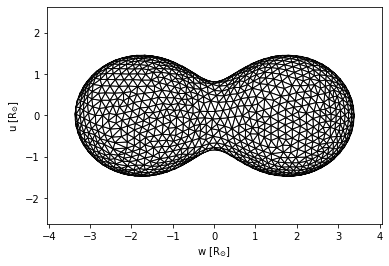

In [39]:
afig, mplfig = b_cb['mesh01@model'].plot(x='ws', show=True)

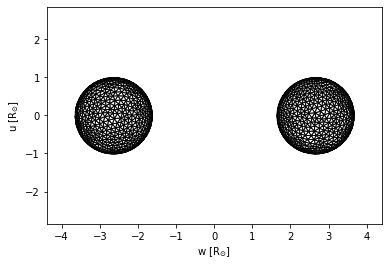

In [40]:
afig, mplfig = b_detached['mesh01@model'].plot(x='ws', show=True)

### Orbits

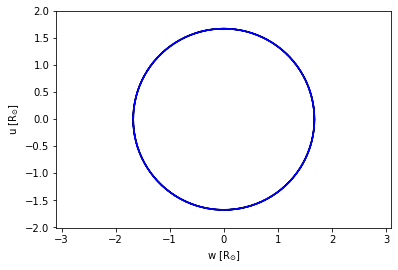

In [41]:
afig, mplfig = b_cb['orb01@model'].plot(x='ws',show=True)

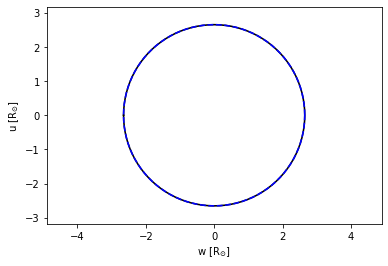

In [42]:
afig, mplfig = b_detached['orb01@model'].plot(x='ws',show=True)

### Light Curves

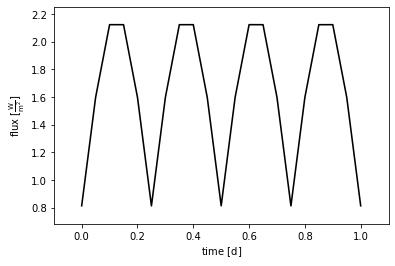

In [43]:
afig, mplfig = b_cb['lc01@model'].plot(show=True)

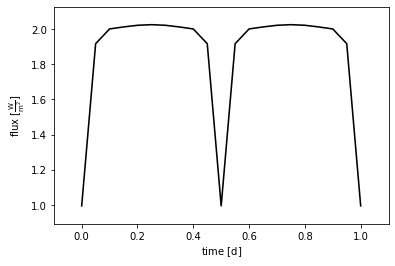

In [44]:
afig, mplfig = b_detached['lc01@model'].plot(show=True)

### RVs

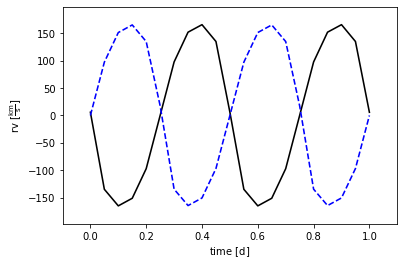

In [45]:
afig, mplfig = b_cb['rv01@model'].plot(show=True)

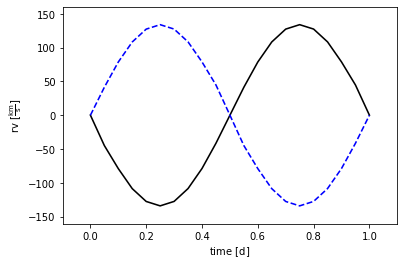

In [46]:
afig, mplfig = b_detached['rv01@model'].plot(show=True)